<a href="https://colab.research.google.com/github/elichen/aoc2019/blob/main/Day_19_Tractor_Beam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
line = "109,424,203,1,21102,11,1,0,1105,1,282,21102,1,18,0,1105,1,259,1201,1,0,221,203,1,21101,0,31,0,1105,1,282,21102,38,1,0,1106,0,259,21001,23,0,2,22101,0,1,3,21101,0,1,1,21102,1,57,0,1105,1,303,2101,0,1,222,21001,221,0,3,20102,1,221,2,21102,259,1,1,21101,80,0,0,1106,0,225,21101,0,111,2,21102,1,91,0,1105,1,303,2102,1,1,223,20101,0,222,4,21102,1,259,3,21102,1,225,2,21102,1,225,1,21101,0,118,0,1105,1,225,20101,0,222,3,21102,148,1,2,21102,1,133,0,1106,0,303,21202,1,-1,1,22001,223,1,1,21102,148,1,0,1106,0,259,2101,0,1,223,20102,1,221,4,21001,222,0,3,21101,0,17,2,1001,132,-2,224,1002,224,2,224,1001,224,3,224,1002,132,-1,132,1,224,132,224,21001,224,1,1,21101,0,195,0,106,0,109,20207,1,223,2,20102,1,23,1,21102,-1,1,3,21101,0,214,0,1105,1,303,22101,1,1,1,204,1,99,0,0,0,0,109,5,2102,1,-4,249,22101,0,-3,1,21202,-2,1,2,21202,-1,1,3,21102,1,250,0,1105,1,225,22102,1,1,-4,109,-5,2106,0,0,109,3,22107,0,-2,-1,21202,-1,2,-1,21201,-1,-1,-1,22202,-1,-2,-2,109,-3,2105,1,0,109,3,21207,-2,0,-1,1206,-1,294,104,0,99,22102,1,-2,-2,109,-3,2106,0,0,109,5,22207,-3,-4,-1,1206,-1,346,22201,-4,-3,-4,21202,-3,-1,-1,22201,-4,-1,2,21202,2,-1,-1,22201,-4,-1,1,21202,-2,1,3,21101,0,343,0,1105,1,303,1105,1,415,22207,-2,-3,-1,1206,-1,387,22201,-3,-2,-3,21202,-2,-1,-1,22201,-3,-1,3,21202,3,-1,-1,22201,-3,-1,2,21201,-4,0,1,21102,384,1,0,1106,0,303,1105,1,415,21202,-4,-1,-4,22201,-4,-3,-4,22202,-3,-2,-2,22202,-2,-4,-4,22202,-3,-2,-3,21202,-4,-1,-2,22201,-3,-2,1,21202,1,1,-4,109,-5,2106,0,0"

In [ ]:
def get_val(index, mode, base, arr):
    if mode == 0:
      return arr.get(arr.get(index,0),0)
    elif mode == 1:
      return arr.get(index,0)
    elif mode == 2:
      return arr.get(arr.get(index,0)+base,0)

def run(input, a, i=0, base=0):
    while i < len(a):
        m3, m2, m1, op = a[i] // 10000, a[i] // 1000 % 10, a[i] // 100 % 10, a[i] % 100
        a1 = get_val(i + 1, m1, base, a)
        a2 = get_val(i + 2, m2, base, a)

        if op == 1:
            addr = a[i+3]+base if m3 == 2 else a[i+3]
            a[addr] = a1 + a2
            i += 4
        elif op == 2:
            addr = a[i+3]+base if m3 == 2 else a[i+3]
            a[addr] = a1 * a2
            i += 4
        elif op == 3:
            if input == None: return None, None, i, base
            addr = a[i+1]+base if m1 == 2 else a[i+1]
            a[addr] = input
            input = None
            i += 2
        elif op == 4:
            return input, a1, i+2, base
        elif op == 5:
            i = a2 if a1 != 0 else i + 3
        elif op == 6:
            i = a2 if a1 == 0 else i + 3
        elif op == 7:
            addr = a[i+3]+base if m3 == 2 else a[i+3]
            a[addr] = 1 if a1 < a2 else 0
            i += 4
        elif op == 8:
            addr = a[i+3]+base if m3 == 2 else a[i+3]
            a[addr] = 1 if a1 == a2 else 0
            i += 4
        elif op == 9:
            base += a1
            i += 2
        elif op == 99:
            return input, None, -99, -99

In [ ]:
import numpy as np
a_orig = {i:int(x) for i,x in enumerate(line.split(','))}
l = 200
m = np.zeros((l,l))
for x in range(l):
  for y in range(l):
    i = 0
    base = 0
    a = a_orig.copy()
    input, output, i, base = run(x, a, i, base)
    input, output, i, base = run(y, a, i, base)
    m[y,x] = output

In [ ]:
np.sum(m == 1)

2286

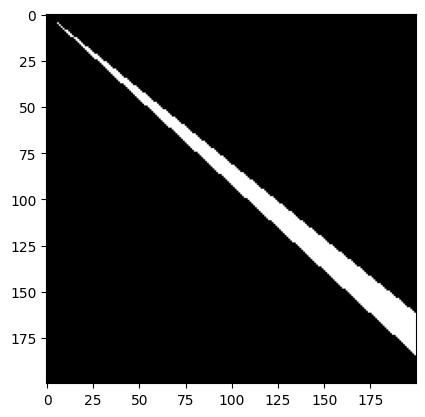

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(m, cmap='gray')
plt.show()

In [ ]:
np.where(m[:,100] == 1)

(array([82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]),)

In [ ]:
def calculate_line_parameters(x1, y1, x2, y2):
    if x1 == x2:
        return None, None  # This would result in a vertical line, which does not have a well-defined slope or y-intercept
    else:
        m = (y2 - y1) / (x2 - x1)  # Calculate slope
        b = y1 - m * x1  # Calculate y-intercept
        return m, b

x1,x2 = 50,199
m1,b1 = calculate_line_parameters(x1, min(np.where(m[:,x1] == 1)[0]), x2, min(np.where(m[:,x2] == 1)[0]))
m2,b2 = calculate_line_parameters(x1, max(np.where(m[:,x1] == 1)[0]), x2, max(np.where(m[:,x2] == 1)[0]))
w = 100
# m1(x)+b1 = m2(x-w)+b2-w
# w+b1-b2 = m2x-m1x-m2w
# w+b1-b2+m2w = (m2-m1)x
x = int(((w-1)+b1-b2+(w-1)*m2)/(m2-m1))
x

1677

In [ ]:
x_start = 1677
y_start = int(1677*m1+b1)

def read_signal(x,y):
  a = a_orig.copy()
  i = 0
  base = 0
  a = a_orig.copy()
  input, output, i, base = run(x, a, i, base)
  input, output, i, base = run(y, a, i, base)
  return output

min_x = x_start
min_y = y_start
while x_start > 1000:
  x_try, y_try = x_start-1, y_start
  while True:
    if read_signal(x_try, y_try-1) == 1:
      y_try -= 1
    else:
      break

  sum_signals = 0
  for mx,my in [(x_try, y_try), (x_try-(w-1), y_try+(w-1))]:
    sum_signals += read_signal(mx,my)
  if sum_signals == 2:
    min_x,min_y = x_try,y_try
  x_start,y_start = x_try,y_try
x_start, y_start

(1000, 811)

In [ ]:
min_x,min_y

(1663, 1348)

In [ ]:
for mx,my in [(min_x, min_y), (min_x-(w-1), min_y+(w-1))]:
  print(mx,my, read_signal(mx,my))

1663 1348 1
1564 1447 1


In [ ]:
import numpy as np
a_orig = {i:int(x) for i,x in enumerate(line.split(','))}
pad = 5
r = np.zeros((w+pad*2,w+pad*2))
x_start = 1564
y_start = 1348
print(x_start, y_start)
for mx in range(x_start-pad, x_start+w+pad):
  for my in range(y_start-pad, y_start+w+pad):
    i = 0
    base = 0
    a = a_orig.copy()
    input, output, i, base = run(mx, a, i, base)
    input, output, i, base = run(my, a, i, base)
    r[my-(y_start-pad),mx-(x_start-pad)] = output
np.sum(r[pad:-pad,pad:-pad] == 1)

1564 1348


10000

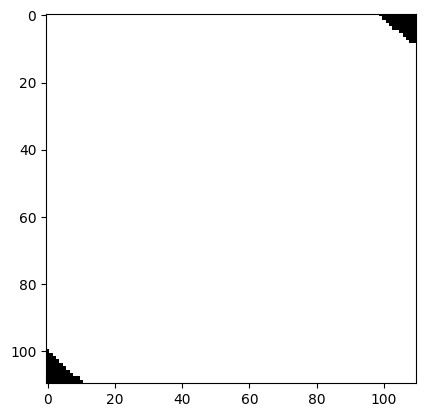

In [ ]:
plt.imshow(r, cmap='gray')
plt.show()

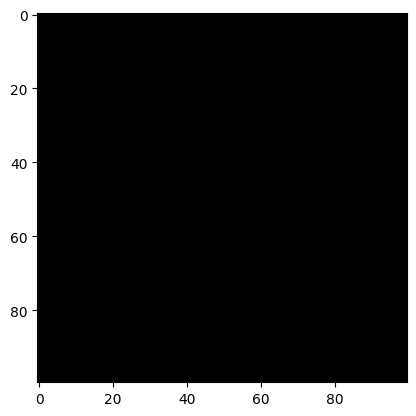

In [ ]:
plt.imshow(r[pad:-pad,pad:-pad], cmap='gray')
plt.show()

In [ ]:
x_start*10000+y_start

15641348